# Análise Exploratória

## Bibliotecas

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.date import get_season

## Leitura dos dados

In [4]:
df = pd.read_csv('../data/data.csv')
total_registros = df.shape[0]

In [5]:
# Primeiras linhas do dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0,1.0,0.0,0,6.0,0,1.0,0.240000,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1.0,0,1.0,1.0,0,6.0,0,1.0,0.220000,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1.0,0,1.0,2.0,0,6.0,0,1.0,0.220000,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1.0,0,1.0,3.0,0,6.0,0,1.0,1.216284,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1.0,0,1.0,4.0,0,6.0,0,NaN,0.240000,NaN,0.75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      16511 non-null  float64
 3   yr          17379 non-null  int64  
 4   mnth        16511 non-null  float64
 5   hr          16511 non-null  float64
 6   holiday     17379 non-null  int64  
 7   weekday     16511 non-null  float64
 8   workingday  17379 non-null  int64  
 9   weathersit  16511 non-null  float64
 10  temp        16511 non-null  float64
 11  atemp       16511 non-null  float64
 12  hum         16511 non-null  float64
 13  windspeed   16511 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(9), int64(7), object(1)
memory usage: 2.3+ MB


Percebe-se que a coluna de data está como string (`object`). Essa variável precisará ser tratada nos próximos passos.

In [7]:
# Resumo estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.000000
season,16511.0,2.503119,1.105889,1.00,2.0000,3.0000,3.0000,4.000000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.000000
mnth,16511.0,6.537520,3.435875,1.00,4.0000,7.0000,10.0000,12.000000
hr,16511.0,11.543516,6.913205,0.00,6.0000,12.0000,18.0000,23.000000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.000000
weekday,16511.0,3.004421,2.007899,0.00,1.0000,3.0000,5.0000,6.000000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.000000
weathersit,16511.0,1.424626,0.638932,1.00,1.0000,1.0000,2.0000,4.000000
temp,16511.0,0.513318,0.268215,0.02,0.3400,0.5000,0.6600,4.898534


A variável da contagem total, `cnt`, possui uma média de aproximadamente 189.5, porém o desvio padrão é muito alto (181.4), o que indica uma grande variação da demanda. Além disso, a mediana é 142, diferente da média e que indica uma leve assimetria na distribuição dessa variável.

## Limpeza dos dados

In [8]:
# Verificando linhas com dados faltantes
df.isnull().sum()

instant         0
dteday          0
season        868
yr              0
mnth          868
hr            868
holiday         0
weekday       868
workingday      0
weathersit    868
temp          868
atemp         868
hum           868
windspeed     868
casual          0
registered      0
cnt             0
dtype: int64

In [9]:
total_linhas_com_nan =df.isnull().any(axis=1).sum()
print(f"O dataset possui {total_linhas_com_nan} linhas com dados faltantes")
print(f"{total_linhas_com_nan/total_registros*100:.2f}% das linhas do dataset apresentam dados faltantes")

O dataset possui 6385 linhas com dados faltantes
36.74% das linhas do dataset apresentam dados faltantes


Temos **36.74% de dados faltantes** neste dataset. Não há valores nulos no total de bicicletas alugadas, e a maioria das variáveis com valores faltantes envolvem medição climática.

Uma alternativa para a correção dessas colunas é a imputação de dados com a média ou mediana, porém nesse caso não é uma boa estratégia. Preencher colunas como `hr`, `temp` com a média ou mediana pode inserir ruído no dataset, além de distorcer preditores essenciais na modelagem.

In [10]:
df['dteday'] = pd.to_datetime(df['dteday'])

# preenchendo dia da semana e mês com base na data
df['weekday'] = df['dteday'].dt.dayofweek
df['mnth'] = df['dteday'].dt.month

In [11]:
# vendo a data min e max por estação em um ano especifico
df_201x = df[df['dteday'].dt.year == 2012]
df_min_max_201x = df_201x.groupby('season').agg({
    'dteday': ['min', 'max']
}).reset_index()

df_min_max_201x

season     dteday           
                min        max
0    1.0 2012-01-01 2012-12-31
1    2.0 2012-03-21 2012-06-20
2    3.0 2012-06-21 2012-09-22
3    4.0 2012-09-23 2012-12-20

Sabendo que no Hemisfério Norte:

- **Primavera**: Março a Junho
- **Verão**: Junho a Setembro
- **Outono**: Setembro a Dezembro
- **Inverno**: Dezembro a Março

E no Hemisfério Sul:

- **Verão**: Dezembro a Março
- **Outono**: Março a Junho
- **Inverno**: Junho a Setembro
- **Primavera**: Setembro a Dezembro

Vemos que a estação de acordo com a label descrita no documento do case não está de acordo com **nenhum** hemisfério. Mas podemos preencher os dados faltantes com base com base nas linhas em que a estação não é nula.

Já a coluna `hr`, por não ter essa informação em datetime, não será possível preencher

In [12]:
# em season, preenche apenas as linhas que possue valores nulos
df.loc[df['season'].isnull(), 'season'] = df.loc[df['season'].isnull(), 'dteday'].apply(get_season)

In [13]:
# Criando labels para variáveis categóricas para uma melhor visualização
df['season_label'] = df['season'].map({1: 'Primavera', 2: 'Verão', 3: 'Outono', 4: 'Inverno'})
df['weekday_label'] = df['weekday'].map({0: 'Dom', 1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sáb'})
df['weathersit_label'] = df['weathersit'].map({
    1: 'Céu Limpo',
    2: 'Neblina/Nuvens',
    3: 'Chuva Leve',
    4: 'Chuva Intensa'
})
df['yr_label'] = df['yr'].map({0: '2011', 1: '2012'})

In [14]:
# removendo linhas com dados faltantes
# não tratamos colunas de medição
df = df.dropna().copy()
df['hr'] = df['hr'].astype(int)
print(f"\nTamanho do DataFrame após a limpeza: {df.shape[0]} linhas")


Tamanho do DataFrame após a limpeza: 12786 linhas


## Análise univariada

### Variável alvo

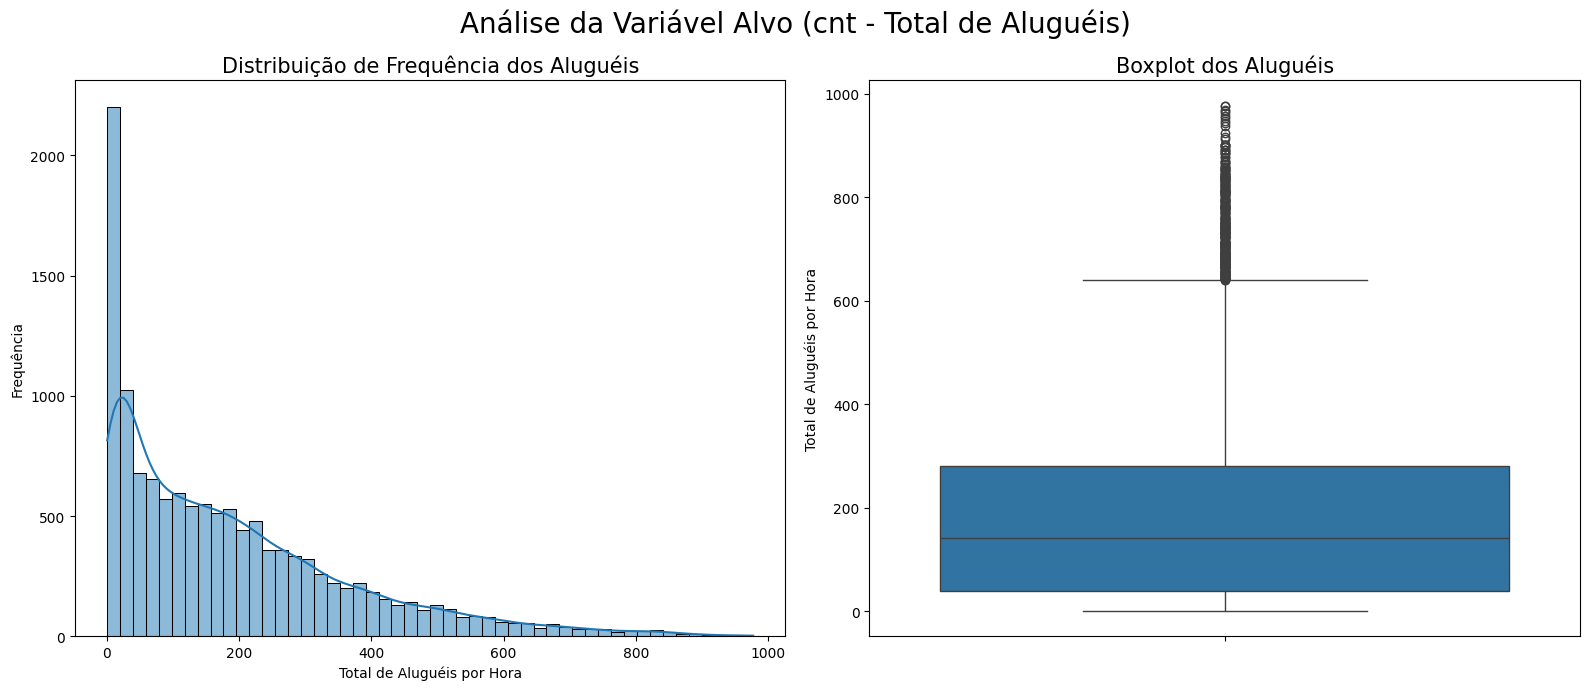

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análise da Variável Alvo (cnt - Total de Aluguéis)', fontsize=20)

sns.histplot(df['cnt'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribuição de Frequência dos Aluguéis', fontsize=15)
axes[0].set_xlabel('Total de Aluguéis por Hora')
axes[0].set_ylabel('Frequência')

sns.boxplot(y=df['cnt'], ax=axes[1])
axes[1].set_title('Boxplot dos Aluguéis', fontsize=15)
axes[1].set_ylabel('Total de Aluguéis por Hora')

plt.tight_layout()
plt.show()

Pelo histograma, vemos claramente que a distribuição do total de aluguéis é **assimétrica à direita**, mostrando que a maioria dos registros horários tem um número baixo a moderado de aluguéis. Em contrapartida, horários com um número muito alto de aluguéis (acima de 400, mais ou menos) são muito mais raros, formando a cauda longa.

O boxplot da figura do lado direito reforça essa disperção. Esses outliers, detectados a partir de 600, serão extremamente importante para os modelos a serem implementados detectarem, pois podem ser indicativos de horários de picos, em determinada época, estação, ou horário especifico.

### Análise de variáveis categóricas

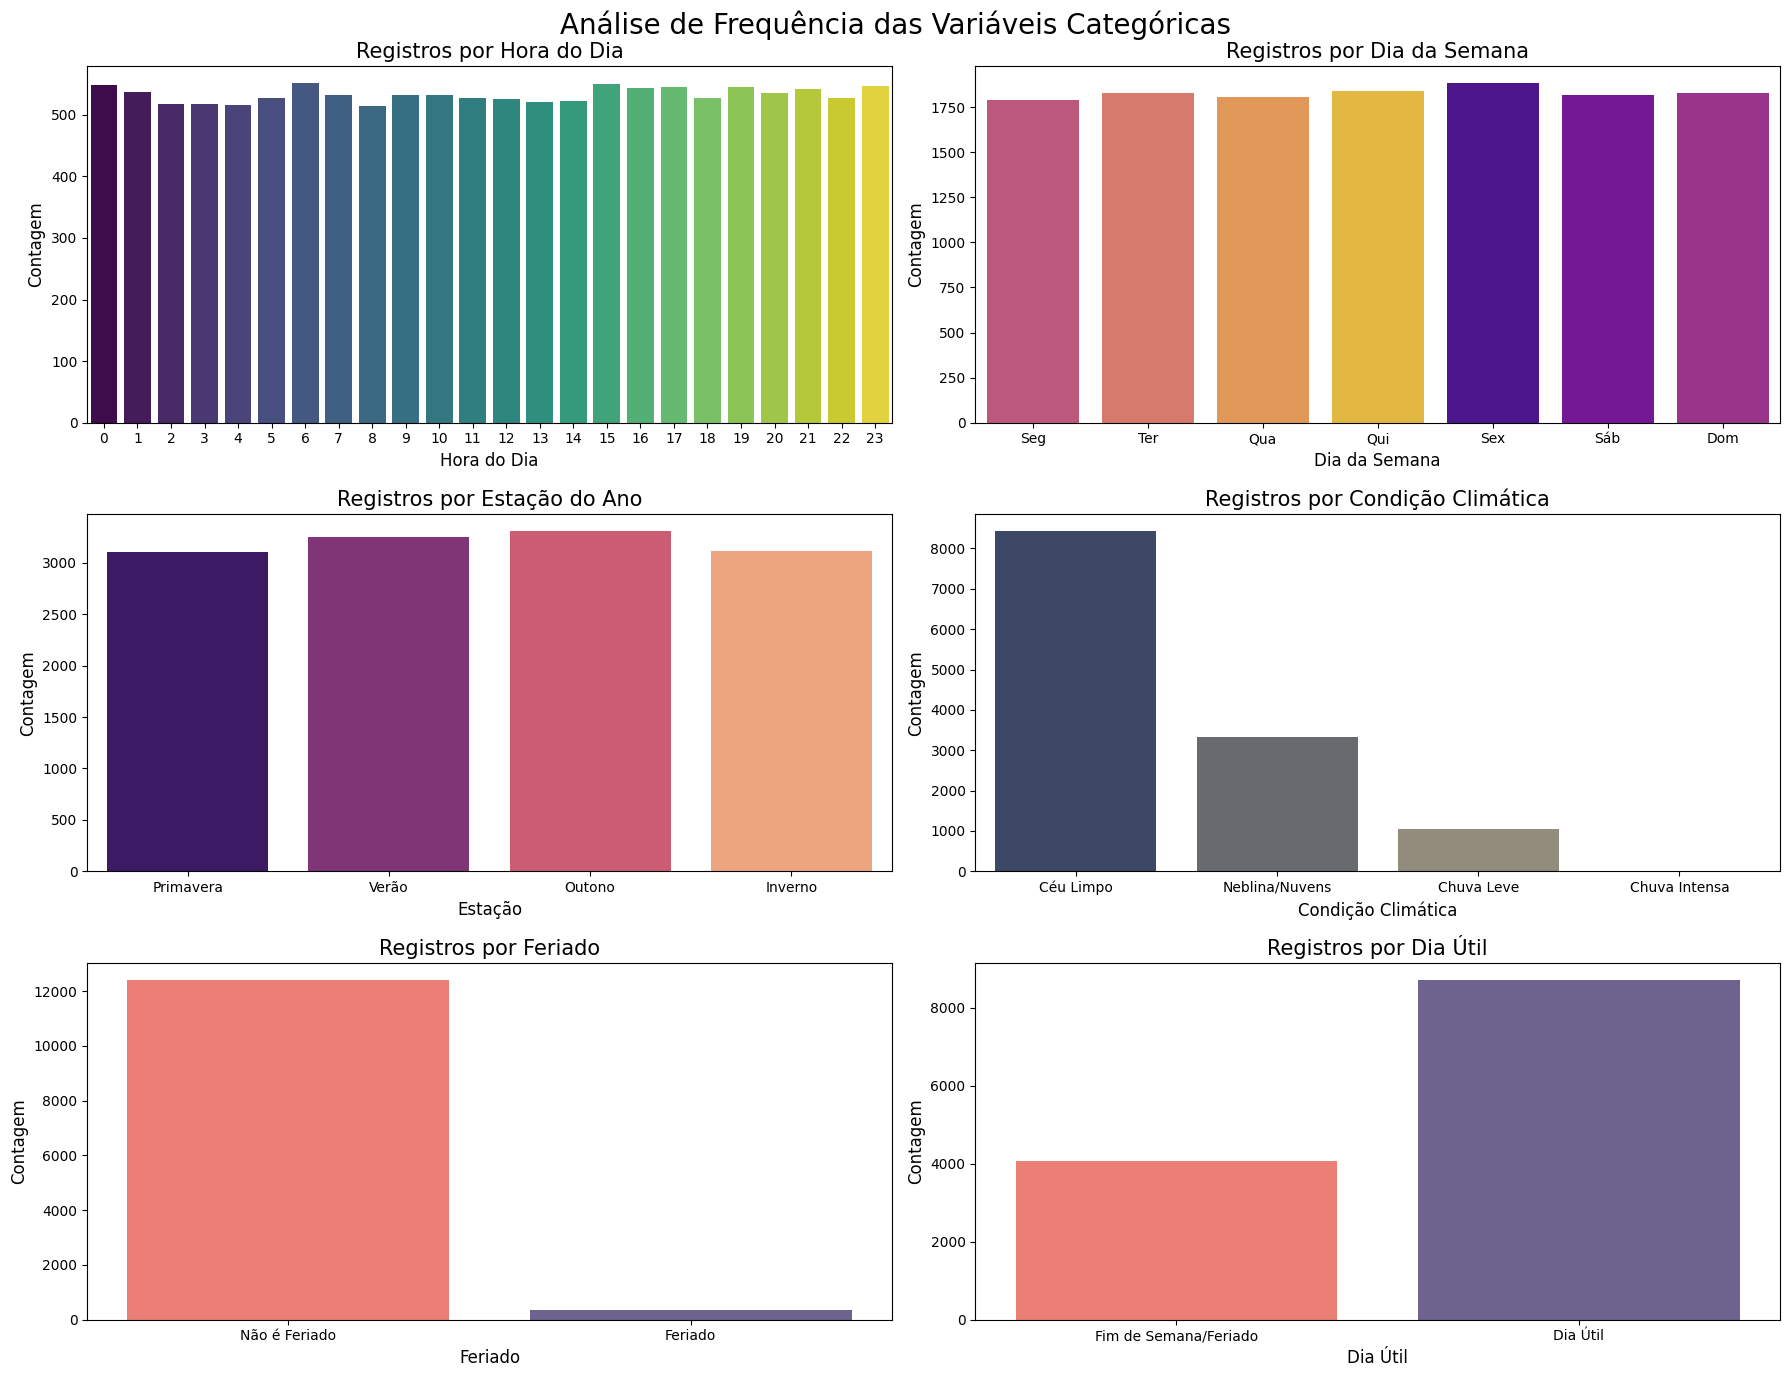

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Análise de Frequência das Variáveis Categóricas', fontsize=20)

# Ordenando para melhor visualização
weekday_order = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
season_order = ['Primavera', 'Verão', 'Outono', 'Inverno']

sns.countplot(ax=axes[0, 0], x='hr', data=df, palette='viridis', hue='hr', legend=False)
axes[0, 0].set_title('Registros por Hora do Dia', fontsize=15)
axes[0, 0].set_xlabel('Hora do Dia', fontsize=12)

sns.countplot(ax=axes[0, 1], x='weekday_label', data=df, order=weekday_order, palette='plasma', hue='weekday_label', legend=False)
axes[0, 1].set_title('Registros por Dia da Semana', fontsize=15)
axes[0, 1].set_xlabel('Dia da Semana', fontsize=12)

sns.countplot(ax=axes[1, 0], x='season_label', data=df, order=season_order, palette='magma', hue='season_label', legend=False)
axes[1, 0].set_title('Registros por Estação do Ano', fontsize=15)
axes[1, 0].set_xlabel('Estação', fontsize=12)

sns.countplot(ax=axes[1, 1], x='weathersit_label', data=df, palette='cividis', hue='weathersit_label', legend=False)
axes[1, 1].set_title('Registros por Condição Climática', fontsize=15)
axes[1, 1].set_xlabel('Condição Climática', fontsize=12)

sns.countplot(ax=axes[2, 0], x='holiday', data=df, palette=['#FF6F61', '#6B5B95'], hue='holiday', legend=False)
axes[2, 0].set_title('Registros por Feriado', fontsize=15)
axes[2, 0].set_xlabel('Feriado', fontsize=12)
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['Não é Feriado', 'Feriado'])

sns.countplot(ax=axes[2, 1], x='workingday', data=df, palette=['#FF6F61', '#6B5B95'], hue='workingday', legend=False)
axes[2, 1].set_title('Registros por Dia Útil', fontsize=15)
axes[2, 1].set_xlabel('Dia Útil', fontsize=12)
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['Fim de Semana/Feriado', 'Dia Útil'])

for i in range(3):
  for j in range(2):
    axes[i, j].set_ylabel('Contagem', fontsize=12)

plt.tight_layout()
plt.show()

Analisando os histogramas, a distribuição por estação do ano, hora e dia da semana são bastante equilibradas, com cada uma possuindo uma distribuição quase uniforme. Temos dados suficientes para cada categoria, o que mostra que os modelos terão basicamente a mesma quantidade de amostras para aprender os padrões de cada uma.

Na condição climática, vemos um maior desbalanceamento. A maioria dos registros ocorrem em "Céu Limpo", porém em categorias como "Chuva Intensa", temos quase nenhum resultado (3).

Em Registros por Feriado, há um grande desbalanceamento, o que para essa variável é normal, já que há muito mais dias normais do que feriados em um ano. No entanto, o modelo terá poucas amostrar para aprender padrões em situações de feriado, o que pode dificultar a precisão nesse cenário.

Em Registro por dia útil, também vemos um desbalanceamento esperado. Sabendo da proporção 5:2, a quantidade de registros em dias úteis é um pouco mais que o dobro em relação aos fins de semana e feriados, o que está de acordo com essa distribuição natural. Ainda assim, mesmo os dias não úteis apresentam milhares de registros, o que deve ser suficiente para que o modelo consiga aprender seus padrões de forma eficaz.

### Análise de Variáveis Numéricas

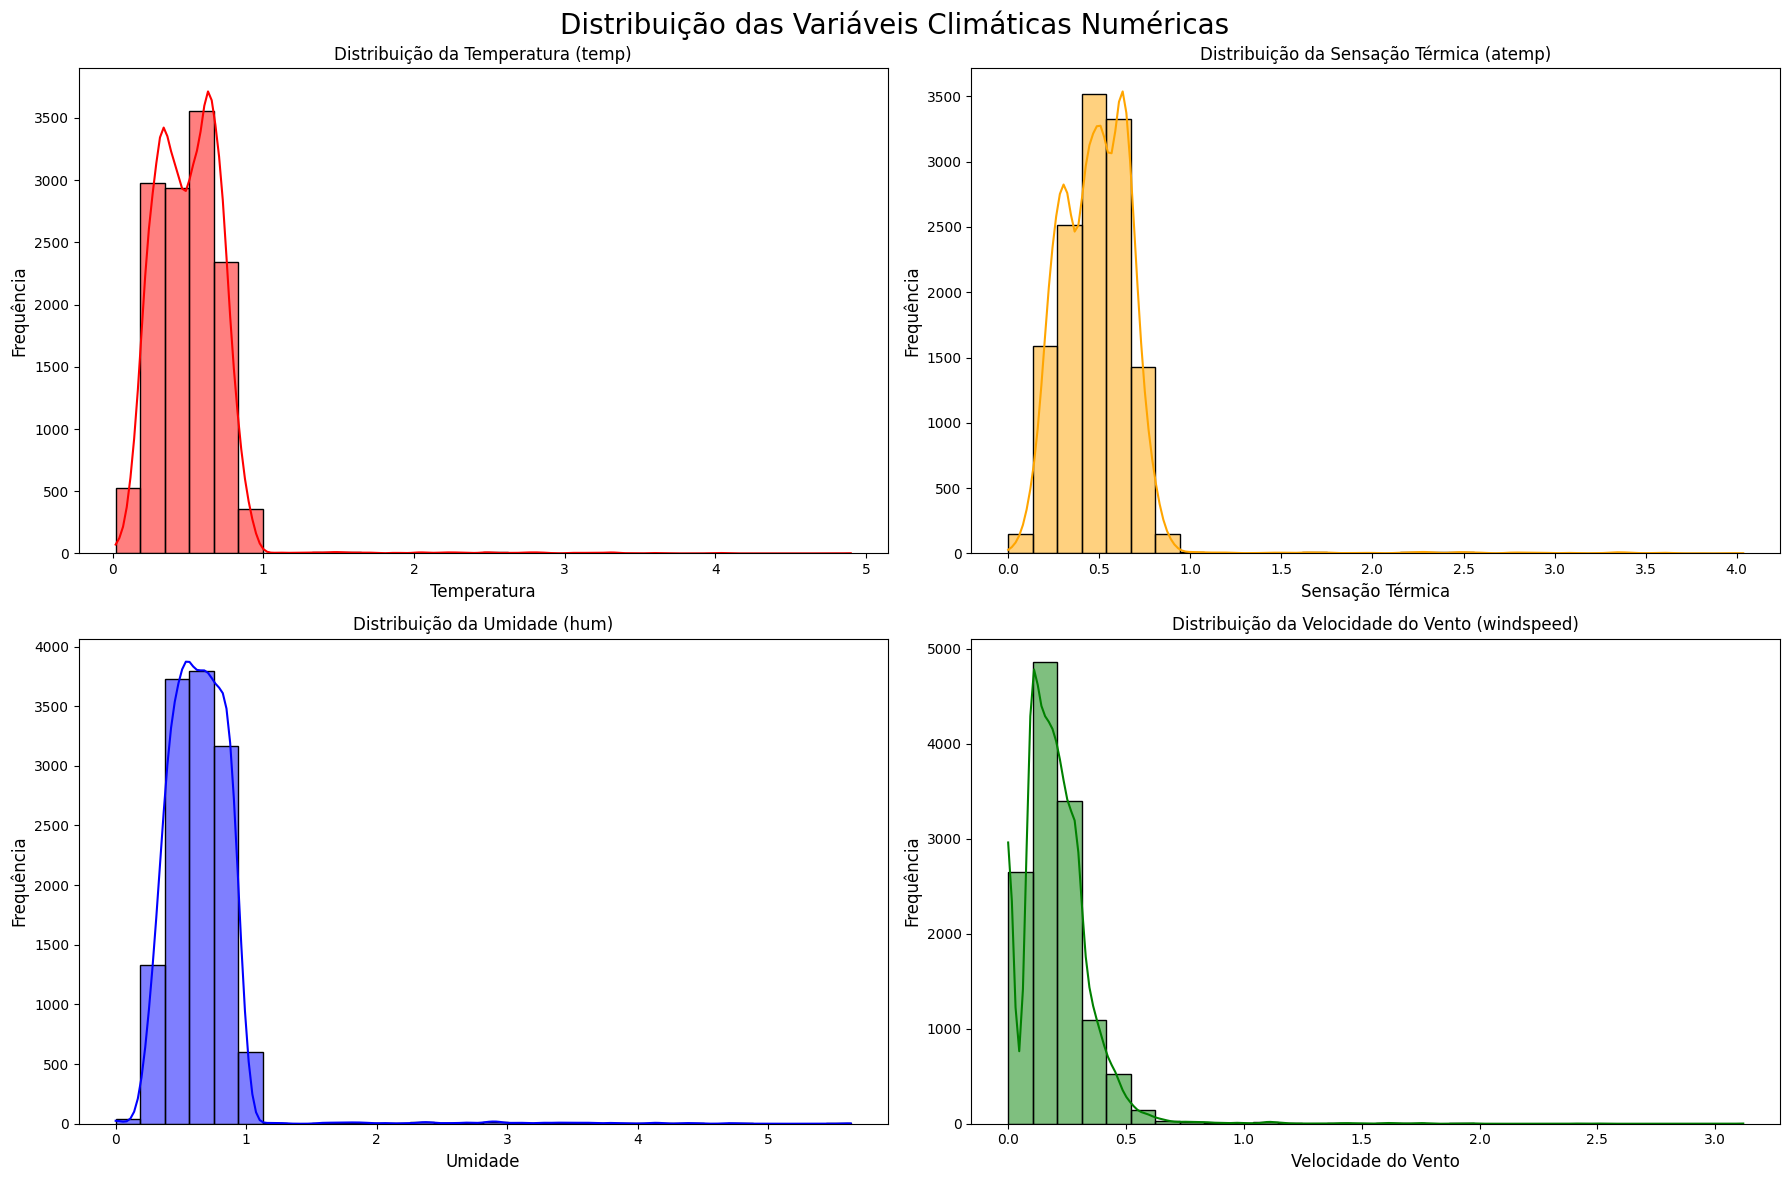

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribuição das Variáveis Climáticas Numéricas', fontsize=20)

sns.histplot(df['temp'], kde=True, ax=axes[0, 0], color='red', bins=30)
axes[0, 0].set_title('Distribuição da Temperatura (temp)')
axes[0, 0].set_xlabel('Temperatura', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)

sns.histplot(df['atemp'], kde=True, ax=axes[0, 1], color='orange', bins=30)
axes[0, 1].set_title('Distribuição da Sensação Térmica (atemp)')
axes[0, 1].set_xlabel('Sensação Térmica', fontsize=12)
axes[0, 1].set_ylabel('Frequência', fontsize=12)

sns.histplot(df['hum'], kde=True, ax=axes[1, 0], color='blue', bins=30)
axes[1, 0].set_title('Distribuição da Umidade (hum)')
axes[1, 0].set_xlabel('Umidade', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)

sns.histplot(df['windspeed'], kde=True, ax=axes[1, 1], color='green', bins=30)
axes[1, 1].set_title('Distribuição da Velocidade do Vento (windspeed)')
axes[1, 1].set_xlabel('Velocidade do Vento', fontsize=12)
axes[1, 1].set_ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

Como esperado, os gráficos de temperatura e sensação térmica são parecidos, e ambos possuem uma forma bimodal/multimodal. Ela sugere que os dados de temperatura se agrupam em torno de dois ou mais regimes climáticos distintos, muito provavelmente correspondendo às estações mais frias (pico da esquerda) e às estações mais quentes (pico da direita). Não há uma transição suave, mas sim "clusters" sazonais de temperatura.

## Análise bivariada

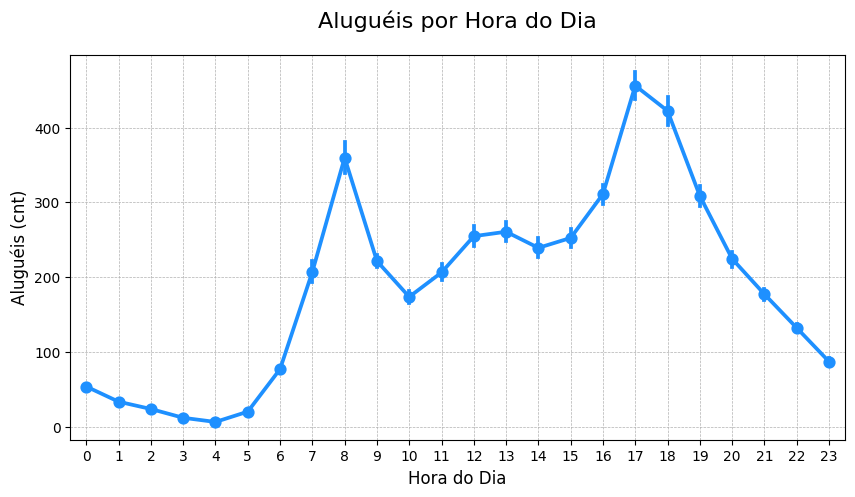

In [18]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x='hr', y='cnt', color='dodgerblue')
plt.title('Aluguéis por Hora do Dia', fontsize=16, pad=20)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Aluguéis (cnt)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

A demanda horária segue um padrão bimodal. Isso reflete o fluxo de deslocamento da população. Já que durante a madrugada a demanda é mínima, mas 8hrs há um pico, referente ao deslocamento matinal de pessoas indo para o trabalho ou escola.

Até chegar 17hrs, a demanda apresenta uma estabilidade, mas entre 17-18 há o maior pico do dia, que pode incluir vários fatores: pessoas voltando do trabalho, horário de lazer/exercício. E após isso, há uma queda da demanda.

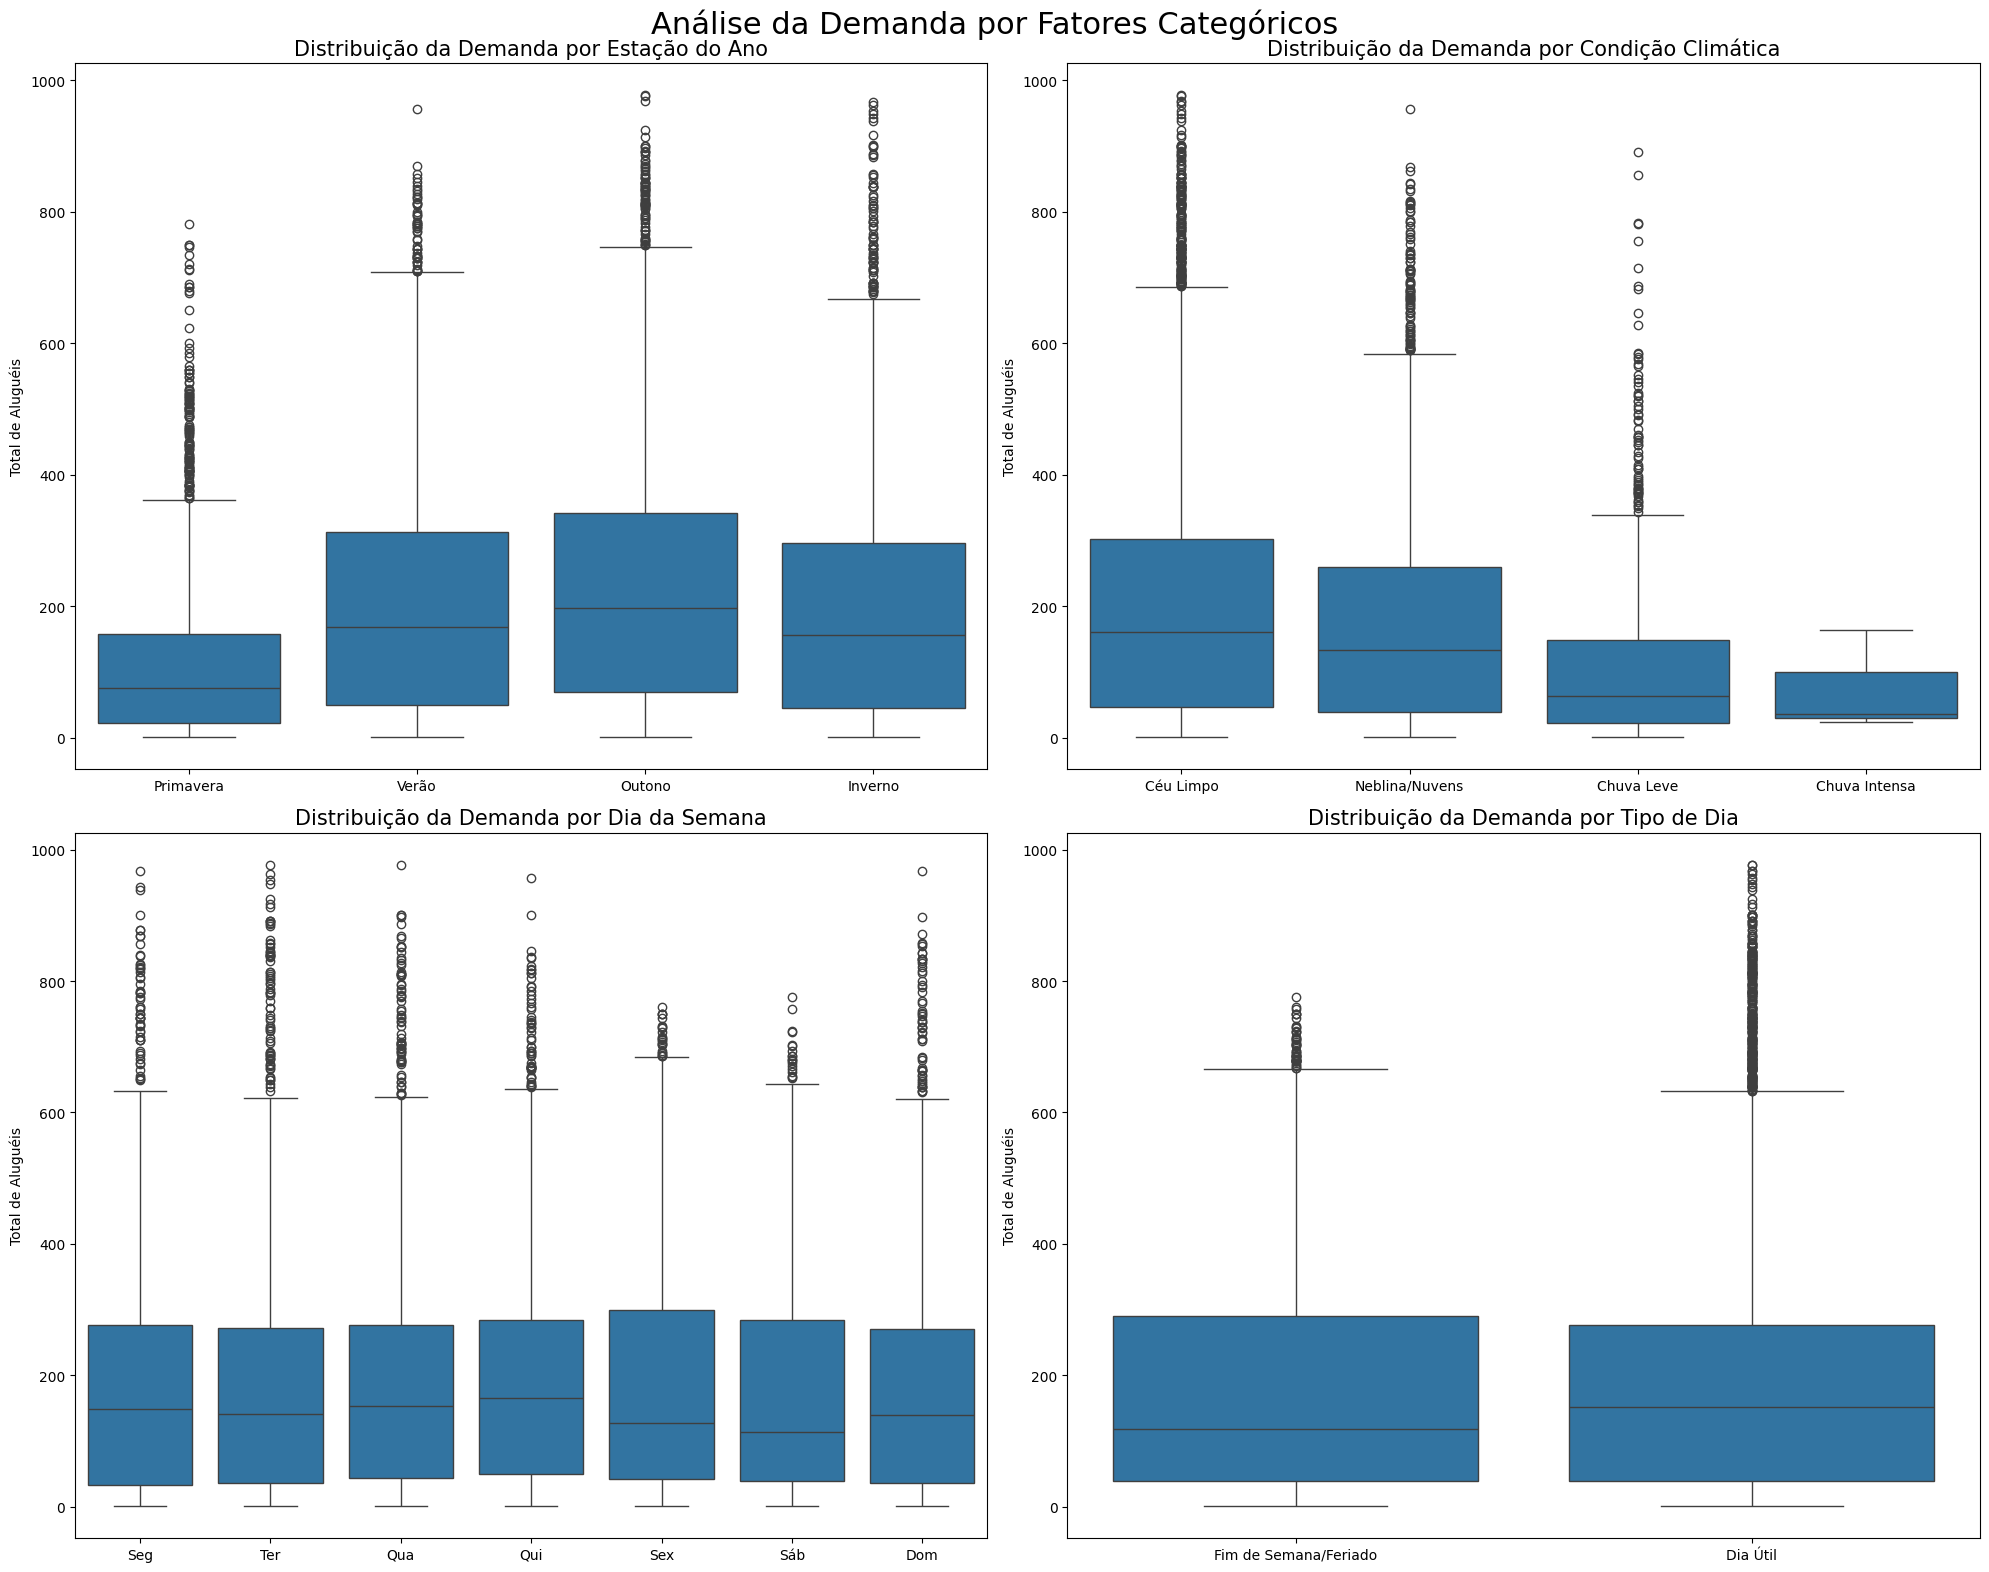

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Análise da Demanda por Fatores Categóricos', fontsize=22)

season_order = ['Primavera', 'Verão', 'Outono', 'Inverno']
weekday_order = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']

sns.boxplot(ax=axes[0, 0], data=df, x='season_label', y='cnt', order=season_order)
axes[0, 0].set_title('Distribuição da Demanda por Estação do Ano', fontsize=15)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Total de Aluguéis')

sns.boxplot(ax=axes[0, 1], data=df, x='weathersit_label', y='cnt', order=['Céu Limpo', 'Neblina/Nuvens', 'Chuva Leve', 'Chuva Intensa'])
axes[0, 1].set_title('Distribuição da Demanda por Condição Climática', fontsize=15)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Total de Aluguéis')

sns.boxplot(ax=axes[1, 0], data=df, x='weekday_label', y='cnt', order=weekday_order)
axes[1, 0].set_title('Distribuição da Demanda por Dia da Semana', fontsize=15)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Total de Aluguéis')

sns.boxplot(ax=axes[1, 1], data=df, x='workingday', y='cnt')
axes[1, 1].set_title('Distribuição da Demanda por Tipo de Dia', fontsize=15)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Fim de Semana/Feriado', 'Dia Útil'])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Total de Aluguéis')

plt.tight_layout()
plt.show()

O Verão e Outono têm as medianas mais altas e caixas mais "esticadas" para cima, indicando uma demanda geral maior e mais variável.

O segundo gráfico mostra uma relação mais intuitiva, com uma queda da demanda à medida que as condições climáticas pioram. Claramente as pessoas não vão querer andar de bicicleta em momentos de chuva, principalmente chuvas intensas, apesar de quase não ter amostras dessa última categoria no dataset.

A demanda por dia da demana e tipo de dia apresentam uma estabilidade ao longo do tempo.

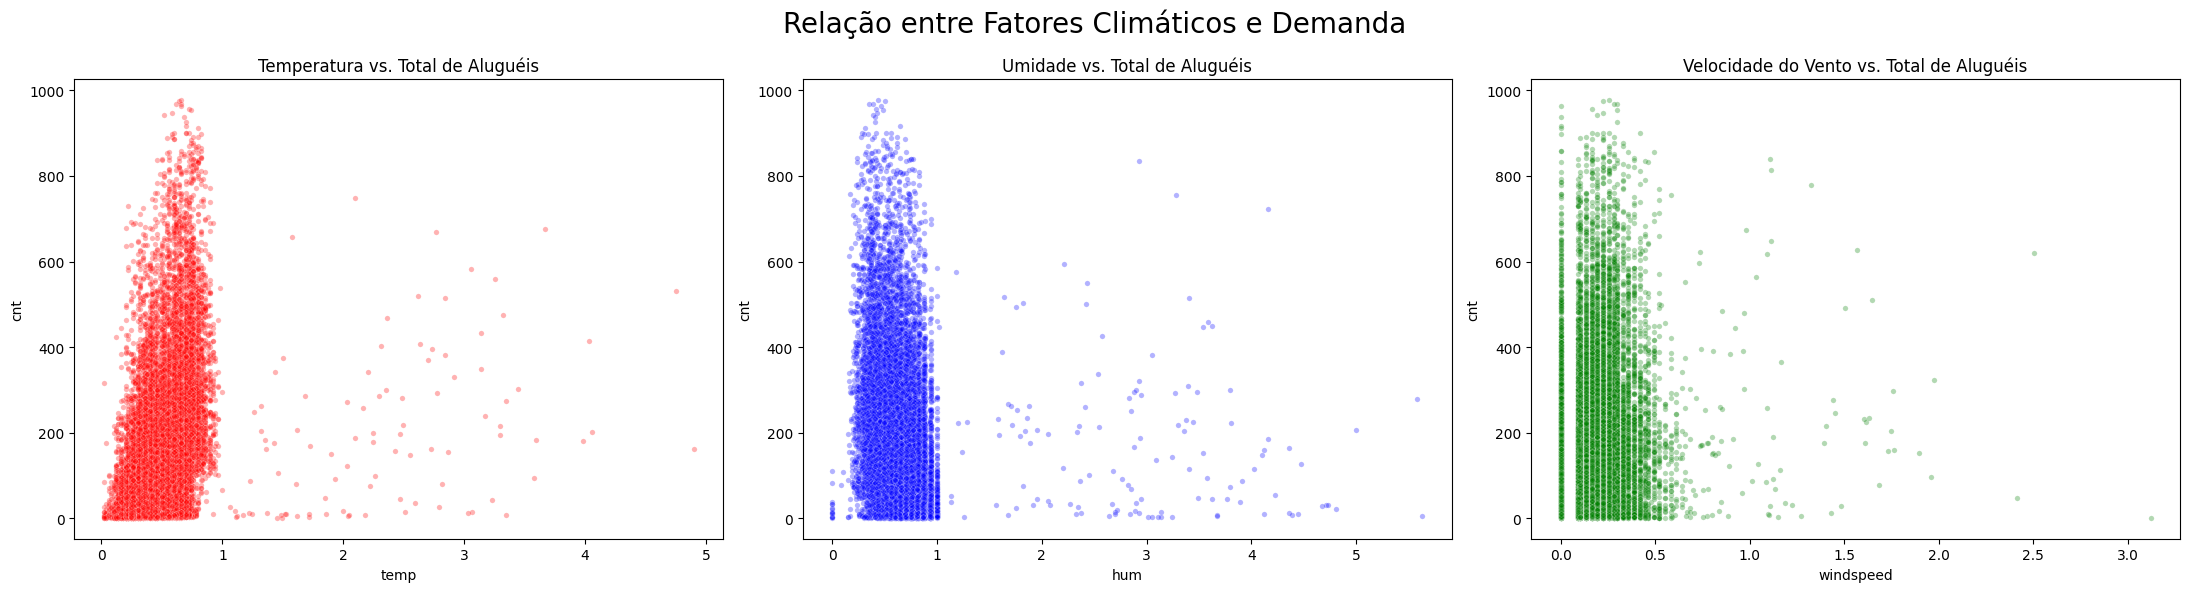

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Relação entre Fatores Climáticos e Demanda', fontsize=20)

# Temperatura vs. Demanda
sns.scatterplot(ax=axes[0], data=df, x='temp', y='cnt', alpha=0.3, s=15, color='red')
axes[0].set_title('Temperatura vs. Total de Aluguéis')

# Umidade vs. Demanda
sns.scatterplot(ax=axes[1], data=df, x='hum', y='cnt', alpha=0.3, s=15, color='blue')
axes[1].set_title('Umidade vs. Total de Aluguéis')

# Velocidade do Vento vs. Demanda
sns.scatterplot(ax=axes[2], data=df, x='windspeed', y='cnt', alpha=0.3, s=15, color='green')
axes[2].set_title('Velocidade do Vento vs. Total de Aluguéis')

plt.tight_layout()
plt.show()

Aqui vemos que a alta umidade atua como um fator limitante, desencorajando o uso de bicicletas. Uma umidade muito alta pode limitar o pico de demanda.

O vento forte também parece ser um desincentivo para o ciclismo, provavelmente por razões de segurança e conforto. Assim como a umidade, o vento age como um fator limitante.

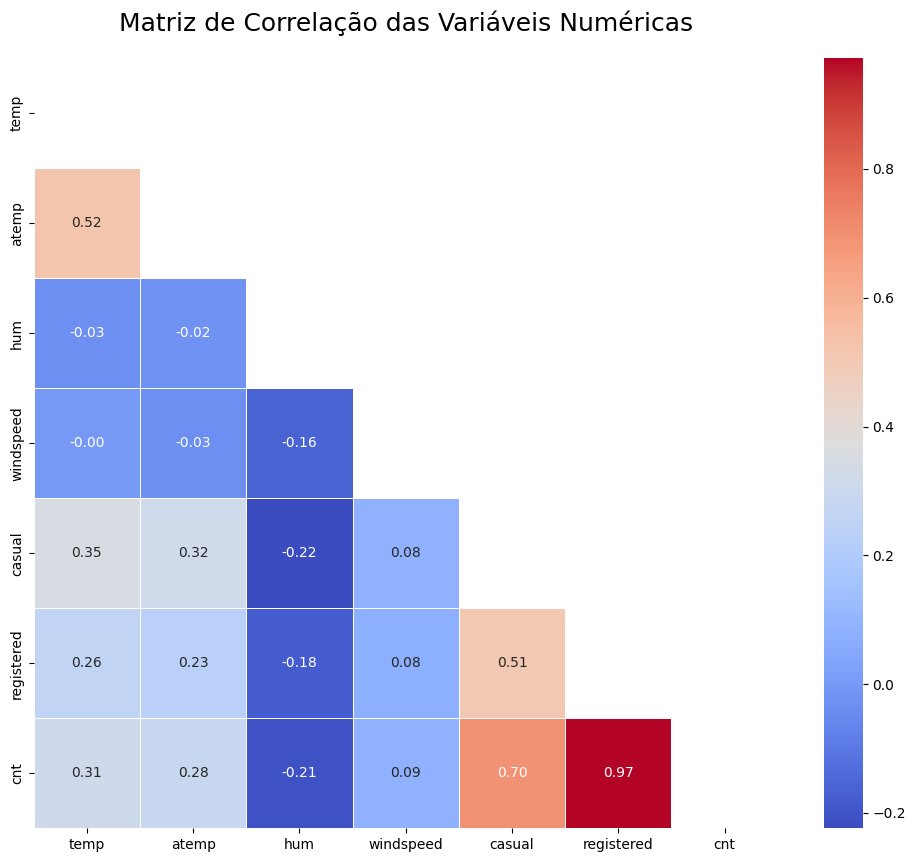

In [21]:
plt.figure(figsize=(12, 10))
# Selecionando colunas numéricas relevantes para a correlação
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = df[numeric_cols].corr()

# Criando a máscara para o triângulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=18, pad=20)
plt.show()

Como vimos no gráfico de dispersão anterior, temperaturas mais altas estão associadas a mais aluguéis. O valor não é mais alto porque a relação não é perfeitamente linear.

Apesar do que foi visto no gráfico anterior, a velocidade do vento possui uma correlação muito fraca com a demanda, quase zero. Isso indica que a relação entre a velocidade do vento e aluguel não é linear, ou seja, possui um padrão que o coeficiente de correlação linear não consegue capturar bem.

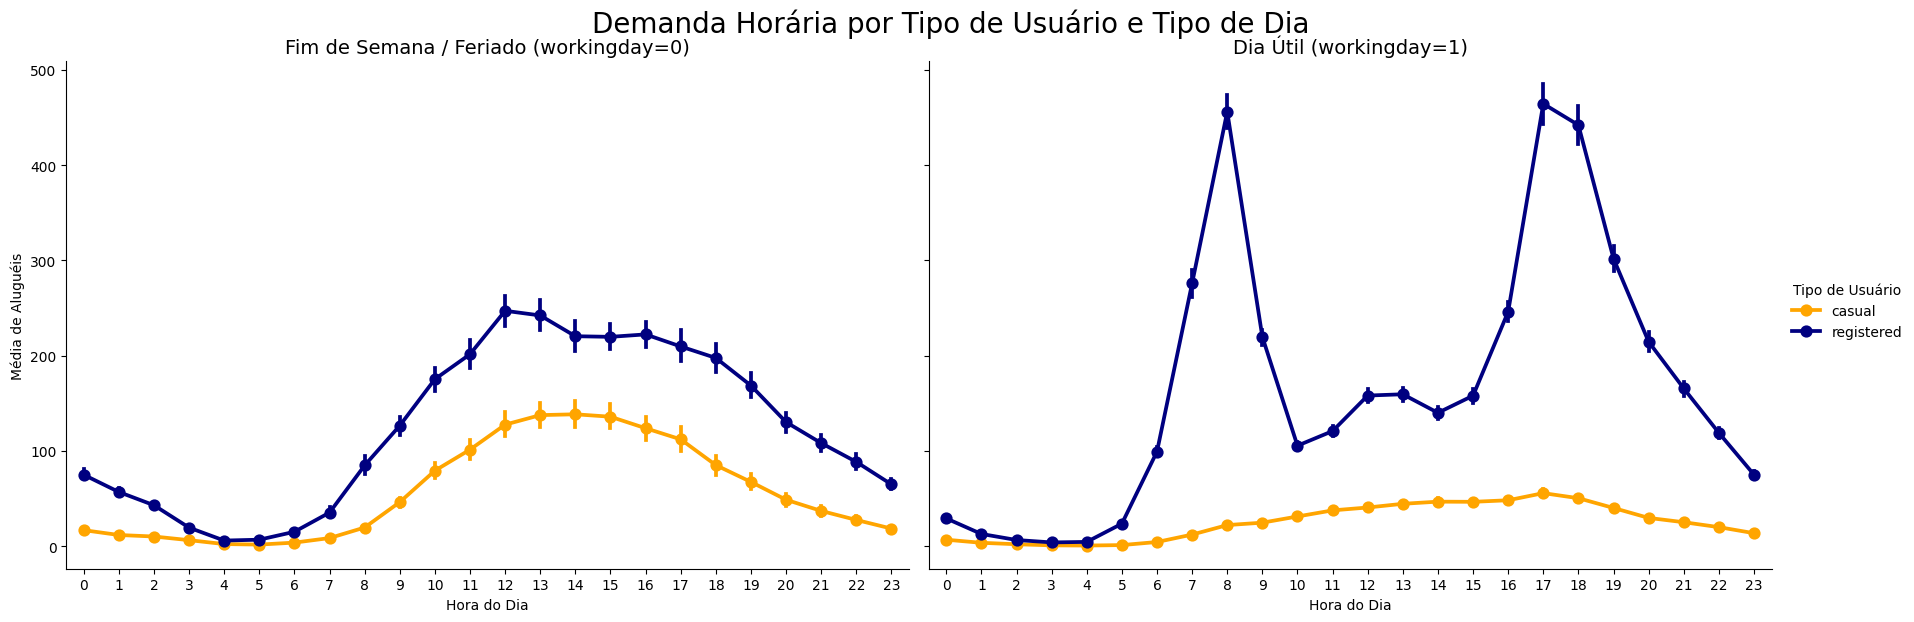

In [22]:
df_melted = df.melt(id_vars=['hr', 'workingday'], value_vars=['casual', 'registered'],
                    var_name='tipo_usuario', value_name='contagem')

g = sns.catplot(
    data=df_melted,
    x='hr',
    y='contagem',
    hue='tipo_usuario',
    col='workingday',
    kind='point',
    height=6,
    aspect=1.5,
    estimator=np.mean,
    palette={'casual': 'orange', 'registered': 'navy'}
)

g.fig.suptitle('Demanda Horária por Tipo de Usuário e Tipo de Dia', fontsize=20, y=1.03)
g.set_axis_labels('Hora do Dia', 'Média de Aluguéis')
g.set_titles("Dia = {col_name}")

axes = g.axes.flatten()
axes[0].set_title('Fim de Semana / Feriado (workingday=0)', fontsize=14)
axes[1].set_title('Dia Útil (workingday=1)', fontsize=14)
g.legend.set_title("Tipo de Usuário")

plt.show()

Comparando o padrão de aluguel horário para usuários casuais e registrados, vemos que durante o dia útil (gráfico da direita), temos para os usuários registrados o padrão bimodal visto anteriormente, com os picos no inicio da manhã e fim da tarde, retratando o deslocamento entre casa e trabalho. Já para usuários casuais, essa demanda apresenta ser mais estável ao longo do dia.

Já em fins de semana ou feriado, vemos um comportamento mais de lazer. Para os dois usuários há uma diferença clara no comportamento, com o padrão bimodal desaparecendo para os usuários registrados, com a demanda/pico maior durante o período da tarde. E apesar de ambos terem um comportamento quase igual, usuários registrados ainda alugam mais bicicletas do que usuários casuais, mesmo em fins de semana.

## Análise multivariada

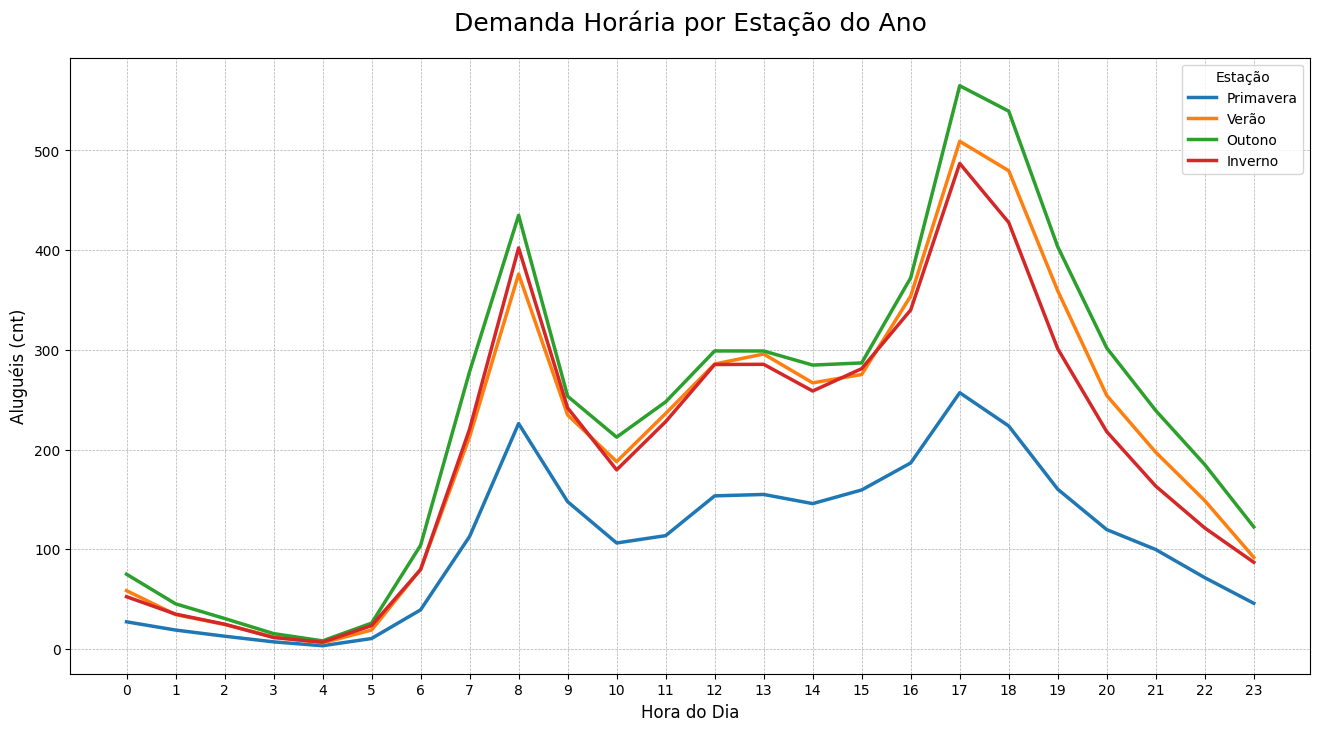

In [ ]:
# Padrão Horário por Estação do Ano
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='hr', y='cnt', hue='season_label',
             hue_order=['Primavera', 'Verão', 'Outono', 'Inverno'],
             errorbar=None, lw=2.5)
plt.title('Demanda Horária por Estação do Ano', fontsize=18, pad=20)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Aluguéis (cnt)', fontsize=12)
plt.xticks(np.arange(0, 24, step=1))
plt.legend(title='Estação')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

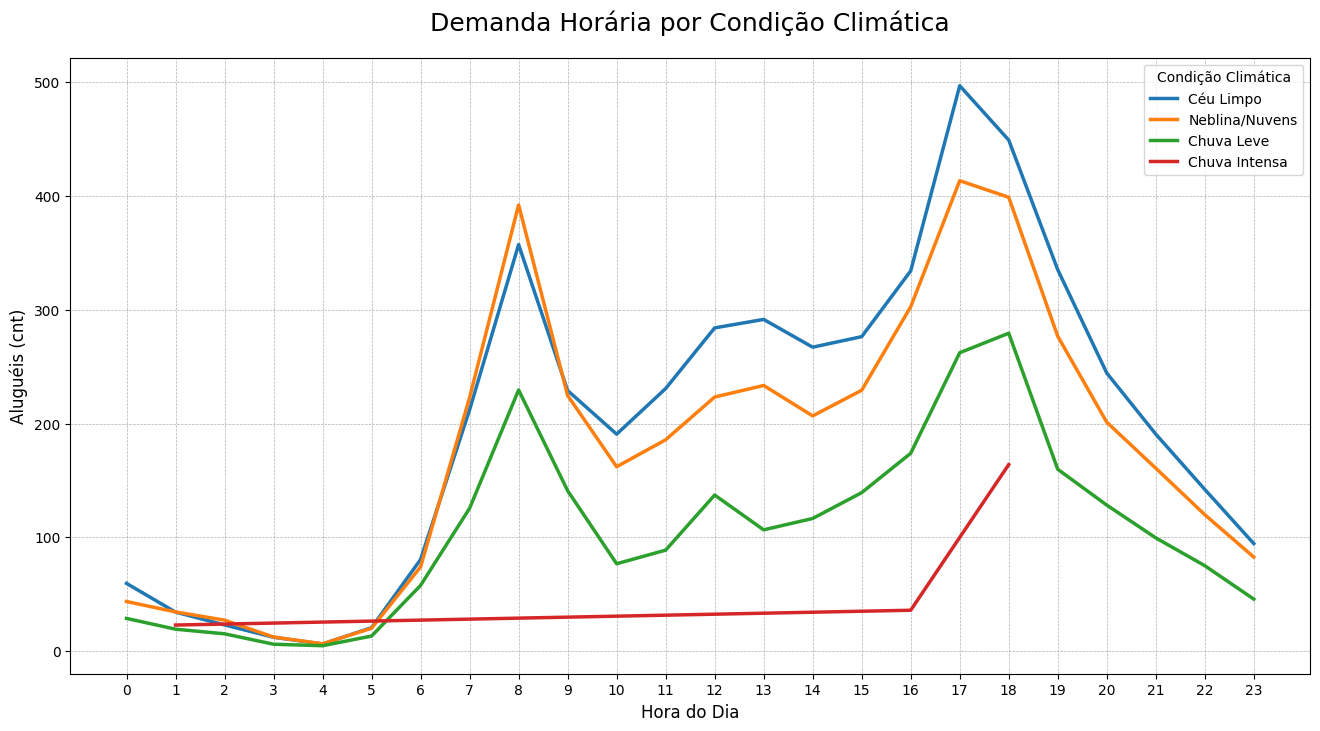

In [ ]:
# Padrão Horário por Condição Climática
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='hr', y='cnt', hue='weathersit_label',
             hue_order=['Céu Limpo', 'Neblina/Nuvens', 'Chuva Leve', 'Chuva Intensa'],
             errorbar=None, lw=2.5)
plt.title('Demanda Horária por Condição Climática', fontsize=18, pad=20)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Aluguéis (cnt)', fontsize=12)
plt.xticks(np.arange(0, 24, step=1))
plt.legend(title='Condição Climática')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

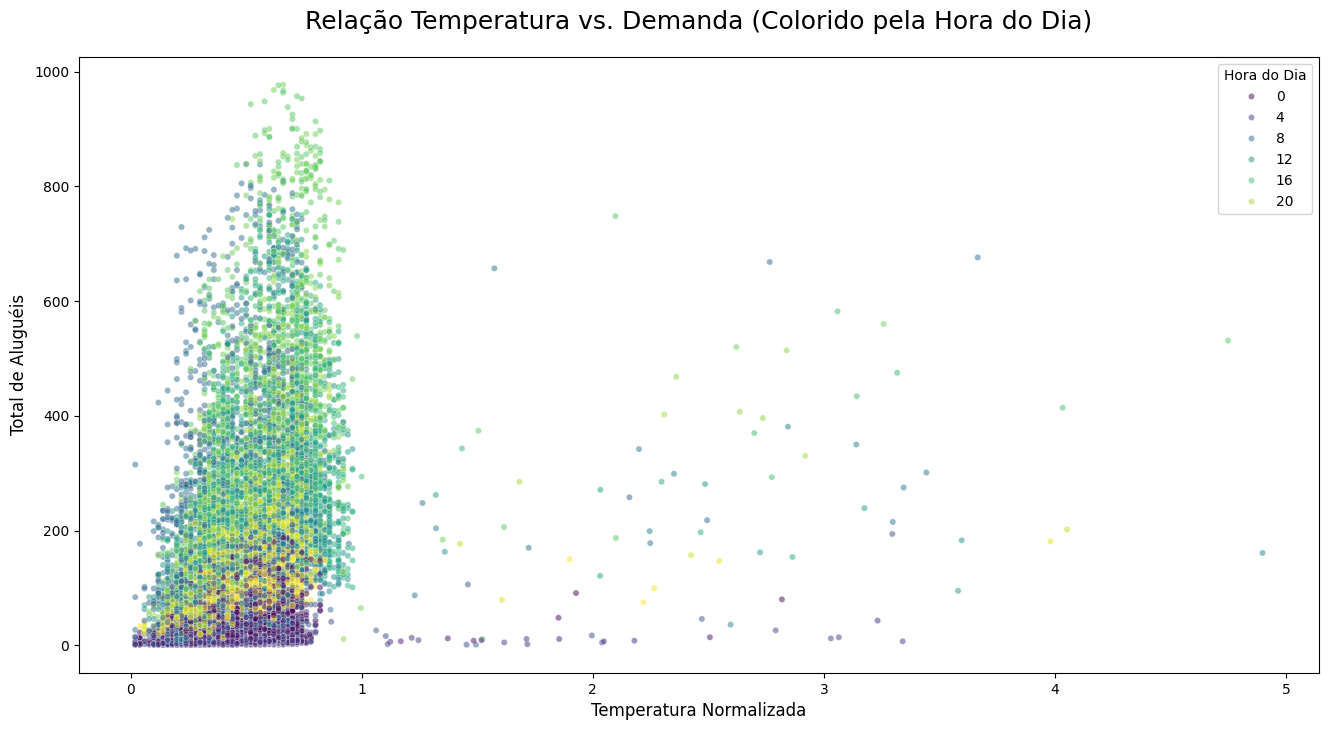

In [ ]:
# Relação Temperatura-Demanda colorida pela Hora do Dia
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='temp', y='cnt', hue='hr', palette='viridis', alpha=0.5, s=20)
plt.title('Relação Temperatura vs. Demanda (Colorido pela Hora do Dia)', fontsize=18, pad=20)
plt.xlabel('Temperatura Normalizada', fontsize=12)
plt.ylabel('Total de Aluguéis', fontsize=12)
plt.legend(title='Hora do Dia')
plt.show()